In [4]:
%aiida
from BigDFT import Datasets as D,Inputfiles as I, AiidaCalculator as C
%load_ext jupyternotify

In [7]:
benchmarks_path="../../../"
inputspath="BigDFT/UO2/PBE/CPU/"
inputset="uo2_3"
inputfile=benchmarks_path+inputspath+inputset+".yaml"
posinp='uo2_3.xyz'
posinpfile=benchmarks_path+inputspath+posinp

In [8]:
import yaml
with open(inputfile, 'r') as stream:
    inp = yaml.safe_load(stream)

In [9]:
#Limit nb of iterations for this set
inp['dft']['itermax']=2

In [10]:
benchData=D.Dataset(label='bench',input=inp,posinp=posinpfile, queue_name='knl_usr_prod', account='Max_devel_0', async=True)

In [5]:
#append MPi and OMP
for nodes in [43,85,169]:
    for mpi in [8]:
        for omp in [8]:
            wtime=int(30*60*(48.0/nodes))
            print(str(wtime)+" max walltime for "+str(nodes)+" nodes")
            code=C.AiidaCalculator(code="bigdft@marconi",num_machines=nodes,mpiprocs_per_machine=mpi,omp=omp, walltime=wtime)
            id={'name':'uo2_3', 'nodes':nodes,'mpi':mpi,'omp':omp}
            benchData.append_run(id=id,runner=code)



1339 max walltime for 43 nodes
Initialize an Aiida Calculator for Remote code 'bigdft' on marconi, pk: 282, uuid: ceae8e8b-cc03-4f12-962b-4adb12b1dd8d with 43 machine(s), 8 processes per machine, and 8 cores per process
677 max walltime for 85 nodes
Initialize an Aiida Calculator for Remote code 'bigdft' on marconi, pk: 282, uuid: ceae8e8b-cc03-4f12-962b-4adb12b1dd8d with 85 machine(s), 8 processes per machine, and 8 cores per process
340 max walltime for 169 nodes
Initialize an Aiida Calculator for Remote code 'bigdft' on marconi, pk: 282, uuid: ceae8e8b-cc03-4f12-962b-4adb12b1dd8d with 169 machine(s), 8 processes per machine, and 8 cores per process


In [6]:
def get_time(DS):
    from os import path as p
    from futile import Time as T
    reload(T)
    datadir=DS.fetch_results(attribute='data_directory')
    run_dir=DS.get_global_option('run_dir')
    time_files=[ p.join(run_dir,d,'time-'+n+'.yaml') for d,n in zip(datadir,DS.names)]
    return T.TimeData(*time_files)

In [8]:
tt=benchData.run()

Creating the yaml input file "./mpi:8,name:uo2_3,nodes:43,omp:8.yaml"
Creating the yaml input file "./mpi:8,name:uo2_3,nodes:85,omp:8.yaml"
Creating the yaml input file "./mpi:8,name:uo2_3,nodes:169,omp:8.yaml"


Wait for completion of all jobs.

In [25]:
def wait_ds(DS):
    from IPython.display import display, clear_output

    running=len(DS.results)
    while(running!=0):

        import time
        time.sleep(1)
        running=len(DS.results)
        for c in DS.results:
            pk=DS.results[c]['node'].pk
            node=load_node(pk)
            if(node.is_finished):
                running-=1
                #print(node.is_finished_ok)
        clear_output(wait=True)
        display(str(running)+" processes still running")


Collect the logfiles

In [10]:
def get_logfiles(DS):
    logfiles={}
    for c in DS.results:
        print(DS.results[c]['node'].pk)
        try:
            logfiles[c]=DS.calculators[0]['calc'].get_logs(DS.results[c]['node'].pk,DS.names[c])
        except:
            logfiles[c]=DS.results[c]
            print("no logfile for "+ str(c))
    return logfiles

In [26]:
%%notify
wait_ds(benchData)

'0 processes still running'

In [27]:
logfiles=get_logfiles(benchData)

1048
setting data dir to /home/ad254919/.aiidapy2/.aiida/repository/adegomme/repository/node/36/09/c42a-6cd1-487b-a379-4d13a947ed29/path
1053
setting data dir to /home/ad254919/.aiidapy2/.aiida/repository/adegomme/repository/node/e8/dc/1740-5d6e-4f4b-a5a7-ad2ac05bcbb0/path
1058
setting data dir to /home/ad254919/.aiidapy2/.aiida/repository/adegomme/repository/node/d9/01/251d-f262-4076-b607-da5686594a00/path


In [31]:
#WARNING : IRREVERSIBLE ! save results first
savedresults=benchData.results
benchData.results=logfiles

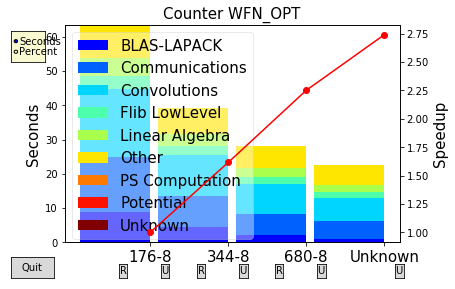

In [44]:
%matplotlib inline
tt=get_time(benchData)

In [46]:
print(tt.totals)

[39.0, 28.0, 23.0]


PBE0

In [ ]:
benchmarks_path="../../"
inputspath="BigDFT/UO2/PBE0/CPU/"
inputset="uo2_3"
inputfile=benchmarks_path+inputspath+inputset+".yaml"
posinp='uo2_3.xyz'
posinpfile=benchmarks_path+inputspath+posinp

In [47]:
import yaml
with open(inputfile, 'r') as stream:
    inp = yaml.safe_load(stream)

inp['dft']['itermax']=2

In [60]:
benchData_pbe0=D.Dataset(label='bench_pbe0',input=inp,posinp=posinpfile, queue_name='knl_usr_prod', account='Max_devel_0', async=True)

In [61]:
for nodes in [43,85,169]:
    for mpi in [8]:
        for omp in [8]:
            wtime=int(30*60*(600.0/nodes))
            print(str(wtime)+" max walltime for "+str(nodes)+" nodes")
            code=C.AiidaCalculator(code="bigdft@marconi",num_machines=nodes,mpiprocs_per_machine=mpi,omp=omp, walltime=wtime)
            id={'name':'uo2_3_pbe0', 'nodes':nodes,'mpi':mpi,'omp':omp}
            benchData_pbe0.append_run(id=id,runner=code)

25116 max walltime for 43 nodes
Initialize an Aiida Calculator for Remote code 'bigdft' on marconi, pk: 282, uuid: ceae8e8b-cc03-4f12-962b-4adb12b1dd8d with 43 machine(s), 8 processes per machine, and 8 cores per process
12705 max walltime for 85 nodes
Initialize an Aiida Calculator for Remote code 'bigdft' on marconi, pk: 282, uuid: ceae8e8b-cc03-4f12-962b-4adb12b1dd8d with 85 machine(s), 8 processes per machine, and 8 cores per process
6390 max walltime for 169 nodes
Initialize an Aiida Calculator for Remote code 'bigdft' on marconi, pk: 282, uuid: ceae8e8b-cc03-4f12-962b-4adb12b1dd8d with 169 machine(s), 8 processes per machine, and 8 cores per process


In [62]:
tt2=benchData_pbe0.run(async=True)

Creating the yaml input file "./mpi:8,name:uo2_3_pbe0,nodes:43,omp:8.yaml"
Creating the yaml input file "./mpi:8,name:uo2_3_pbe0,nodes:85,omp:8.yaml"
Creating the yaml input file "./mpi:8,name:uo2_3_pbe0,nodes:169,omp:8.yaml"


In [64]:
%%notify
wait_ds(benchData_pbe0)

'0 processes still running'

<IPython.core.display.Javascript object>

In [65]:
logfiles_pbe0=get_logfiles(benchData_pbe0)


1134
setting data dir to /home/ad254919/.aiidapy2/.aiida/repository/adegomme/repository/node/85/7e/b9eb-4de5-4ee1-a3b7-33c467090822/path
1139
setting data dir to /home/ad254919/.aiidapy2/.aiida/repository/adegomme/repository/node/4c/9e/b103-7161-4734-a862-f12d953ac5c5/path
1144
setting data dir to /home/ad254919/.aiidapy2/.aiida/repository/adegomme/repository/node/36/9f/53cd-fa1d-4a4b-9735-e875a386c45e/path


In [79]:
#WARNING : IRREVERSIBLE ! save results first
savedresuls_pbe0=benchData_pbe0.results
benchData_pbe0.results=logfiles_pbe0

43
mpi:8,name:uo2_3_pbe0,nodes:43,omp:8
85
mpi:8,name:uo2_3_pbe0,nodes:85,omp:8
169
mpi:8,name:uo2_3_pbe0,nodes:169,omp:8


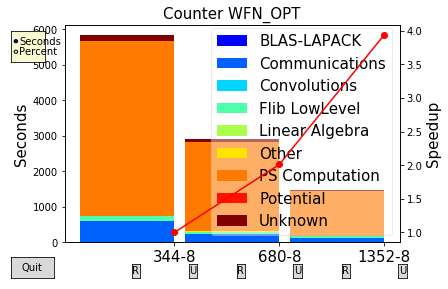

In [96]:
%matplotlib inline
tt2=get_time(benchData_pbe0)

/home/ad254919/.aiidapy2/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


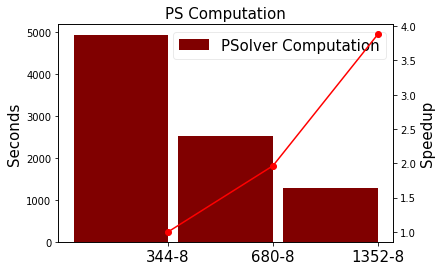

In [97]:
%matplotlib inline
#tt2=get_time(benchData_pbe0)
tt3=tt2.inspect_category("PS Computation")

In [113]:
from shutil import copytree

for nodes in [43,85,169]:
    id={'name':'uo2_3_pbe0', 'nodes':nodes,'mpi':8,'omp':8}
    print nodes
    datadir=benchData_pbe0.fetch_results(id=id,attribute='data_directory')
    name=D.name_from_id(id)
    foldername=id['name']+"/"+str(id['nodes'])+"nodes_"+str(id['mpi'])+"mpi_"+str(id['omp'])+"omp"
    print (foldername)
    copytree(datadir[0], foldername)
    
for nodes in [43,85,169]:
    id={'name':'uo2_3', 'nodes':nodes,'mpi':8,'omp':8}
    print nodes
    datadir=benchData.fetch_results(id=id,attribute='data_directory')
    name=D.name_from_id(id)
    foldername=id['name']+"/"+str(id['nodes'])+"nodes_"+str(id['mpi'])+"mpi_"+str(id['omp'])+"omp"
    print (foldername)
    copytree(datadir[0], foldername)
    
#rename uo2_3 to uo2_3_pbe

43
uo2_3_pbe0/43nodes_8mpi_8omp
85
uo2_3_pbe0/85nodes_8mpi_8omp
169
uo2_3_pbe0/169nodes_8mpi_8omp
